<a href="https://colab.research.google.com/github/yuuki08noah/Python-Programming/blob/master/python03_3_re_ipynb(%EA%B3%BD%EC%83%81%EB%AF%B8T%EB%B3%B4%EA%B0%95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **re모듈**
### **정규표현식(regular expression)**
+ 특정한 규칙을 가진 문자열의 패턴을 표현하는 데 사용하는 표현식(Expression)
+ 복잡한 문자열을 처리할 때 사용
+ 텍스트에서 특정 문자열을 검색하거나 치환할 때 사용
+ 파이썬 뿐만 아니라 문자열을 처리하는 모든 곳에서 사용

### **정규 표현식을 지원하기 위해 re모듈**
+ **re모듈**은 파이썬을 설치할 때 자동으로 설치되는 기본 라이브러리
+ 패턴과 매치하는 텍스트를 찾고 조작하는 기능을 제공

### **re모듈 사용방법**
#### 컴파일 하는 방법
+ 검색할 패턴을 컴파일 하여 사용
+ 같은 문자를 여러 번 검색하는 경우에 사용하는 방법
+ 매번 검색 패턴을 지정하지 않아도 되기 때문에 검색 속도가 빠름


```
pt = re.compile('10')
print(pt.search(data))
```



#### 컴파일 하지 않는 방법
+ 검색할 때마다 패턴을 설정하는 방법
+ 검색할 패턴이 매번 다른 경우에 사용



```
print(re.search('10',data))
```



In [ ]:
# re 모듈 추가
import re
data = '의뢰인 별점 - 총 10점 중10 다시봐도 명연기. 모든 배우들의 연기가 쫄깃 신고	morn**** 20.05.23'

## **정규표현식 검색**
#### **match(pattern, string)**
+ 문자열의 시작부분부터 매칭이 되는지 검색.
+ matchObject 인스턴트로 반환


In [ ]:
print(re.match('10', data))

None


#### **search(pattern, string)**
+ 문자열에 패턴과 매칭되는 곳이 있는지 검색.
+ **match() 함수와 차이점은 검색 대상 문자열의 시작 부분이 매칭되지 않아도 검색**
+ 여러 개 매칭 시 처음에 검색된 부분을 반환
+ matchObject 인스턴트로 반환


In [ ]:
print(re.search('10', data))

<re.Match object; span=(11, 13), match='10'>


#### **findall(pattern, string)**
+ 정규식과 매치되는 모든 문자열을 리스트로 반환.

In [ ]:
print(re.findall('10', data))

['10', '10']


#### **finditer(pattern, string)**
+ 정규식과 매치되는 모든 문자열을 iterator 객체로 반환.
+ 반환 값을 for문을 사용하여 모두 추출


In [ ]:
print(re.finditer('10', data))

In [ ]:
data2 = re.finditer('10', data)
for item in data2:
    print(item)

<_sre.SRE_Match object; span=(11, 13), match='10'>
<_sre.SRE_Match object; span=(16, 18), match='10'>


## **정규표현식 정보 추출**
#### **group()**
+ 매칭된 문자열

#### **start()**
+ 매칭된 문자열 시작 위치

#### **end()**
+ 매칭된 문자열 종료 위치

#### **span()**
+ 매칭된 문자열 시작과 종료위치를 튜플로 반환

In [ ]:
data10 = re.search('10', data)
print(data10)
print(data10.group())
print(data10.start())
print(data10.end())
print(data10.span())

<_sre.SRE_Match object; span=(11, 13), match='10'>
10
11
13
(11, 13)


In [ ]:
data10s = re.finditer('10', data)
for item in data10s:
    print(item.group())
    print(item.span())

10
(11, 13)
10
(16, 18)


### **정규표현식 메타 문자**
+ 원래 그 문자가 가진 뜻이 아닌 특별한 용도로 사용하는 문자
 - . ^ $ * + ? { } [ ] \ | ( )
+ 정규 표현식에 메타 문자를 사용하면 특별한 의미를 갖게 됨



#### **Raw 문자열 표기법**
+ 검색 패턴에 raw문자인 r을 문자열 앞에 더한 것
 - 문자열 안에 있는 백슬러시 문자를 특수한 의미를 가진(에스케이프) 문자가 아닌 백슬러시 문자 그대로 인식



#### **메타문자 : []**
+ 문자 클래스(character class)
+ \[ ] 사이의 문자들과 매치
 - 예) [abc] : a, b, c 중 한 개의 문자와 매치
+ \[ ] 안의 두 문자 사이에 하이픈(-)을 사용
 - 두 문자 사이의 범위(From - To)를 의미
 - 예) [a-zA-Z] : 알파벳 모두, [0-9] : 숫자

In [ ]:
data = '의뢰인 별점 - 총 10점 중10 다시봐도 명연기. 모든 배우들의 연기가 쫄깃 신고	morn**** 20.05.23'

In [ ]:
pattern = '[a-z]'
alphabet = re.search(pattern, data)
print(alphabet)

<_sre.SRE_Match object; span=(47, 48), match='m'>


+ 자주 사용하는 문자 클래스
 - \d : 숫자와 매치, [0-9]와 동일한 표현식
 - \D : 숫자가 아닌 것과 매치, [^0-9]와 동일한 표현식
 - \s : whitespace 문자와 매치 , [ \t\n\r\f\v]와 동일한 표현식 : 맨 앞의 빈 칸은 공백문자(space)를 의미
 - \S : whitespace 문자가 아닌 것과 매치
 - \w : 문자+숫자(alphanumeric)와 매치, [a-zA-Z0-9_]와 동일한 표현식
 - \W : 문자+숫자(alphanumeric)가 아닌 문자와 매치, [^a-zA-Z0-9_]와 동일한 표현식

In [ ]:
pattern = '[\d]'
alphabet = re.search(pattern, data)
print(alphabet)

<_sre.SRE_Match object; span=(11, 12), match='1'>


#### **메타문자 : ^**
+ 반대(not)
 - 예) [^0-9]라는 정규 표현식은 숫자가 아닌 문자만 매치


In [ ]:
pattern = '[^\d]'
alphabet = re.search(pattern, data)
print(alphabet)

<_sre.SRE_Match object; span=(0, 1), match='의'>


#### **메타문자 : Dot(.)**
+ 줄바꿈 문자인 \n을 제외한 모든 문자와 매치됨을 의미
 - 예) a.b : a와 b라는 문자 사이에 어떤 문자가 들어가도 모두 매치
+ 문자 클래스([]) 내에 Dot(.) 메타 문자가 사용
 - "모든 문자"라는 의미가 아닌 문자 . 그대로를 의미  
 - 예) a[.]b :

In [ ]:
pattern = '[\d].[\w]'
alphabet = re.search(pattern, data)
print(alphabet)

<_sre.SRE_Match object; span=(11, 14), match='10점'>


In [ ]:
pattern = '[\d][.]'
alphabet = re.search(pattern, data)
print(alphabet)

<_sre.SRE_Match object; span=(57, 59), match='0.'>


#### **메타문자 : 반복 (*)**
+ 예) ab*c  : 문자 b가 0부터 무한대로 반복될 수 있다는 의미로 b가 한번도 나오지 않는 ac도 매치


In [ ]:
pattern = '[\d]*[.]'
alphabet = re.search(pattern, data)
print(alphabet)

<_sre.SRE_Match object; span=(27, 28), match='.'>


#### **메타문자 : 반복 (+)**
+ 예) ab+c : 최소 1번 이상 반복될 때 사용하므로 ac는 매치가 되지 않음

In [ ]:
pattern = '[\d]+[.]'
alphabet = re.search(pattern, data)
print(alphabet)

<_sre.SRE_Match object; span=(56, 59), match='20.'>


#### **메타문자:반복 {m,n}**
+ 반복 횟수를 고정
 - {m, n} 정규식을 사용하면 반복 횟수가 m부터 n까지 매치
+ m 또는 n을 생략하면 m은 0과 동일하며, 생략된 n은 무한대의 의미
 - 예) ab{2}c : b가 2회만 반복되면 매치
 - 예) ab{2,5}c : b가 2회에서 5회까지 반복되면 매치


In [ ]:
pattern = '[\d]{2}[.]'
alphabet = re.search(pattern, data)
print(alphabet)

<_sre.SRE_Match object; span=(56, 59), match='20.'>


#### **메타문자: ?**
+ 없거나 하나만 있으면 매치
 - 예) ab?c : b가 없거나 하나만 있는 경우 매치


In [ ]:
pattern = '[\d]{2}[.]?'
alphabet = re.search(pattern, data)
print(alphabet)

<_sre.SRE_Match object; span=(11, 13), match='10'>


#### **메타문자:()**
+ 반환 값을 그룹 설정
 - group() 혹은 group(0)  
+ 전체 가져오기
 - group(n)
 - 첫번째 그룹 가져오기

In [ ]:
pattern = '([\d]{2})[.]([\d]{2})[.]([\d]{2})'
alphabet = re.search(pattern, data)
print(alphabet)
print(alphabet.group())
print(alphabet.group(0))
print(alphabet.group(1))
print(alphabet.group(2))
print(alphabet.group(3))

<_sre.SRE_Match object; span=(56, 64), match='20.05.23'>
20.05.23
20.05.23
20
05
23




---


해결문제) 영화 평점에 대한 정보가 있는 평점.txt 파일을 읽어서 개인별 평점 그래프를 작성하시오.

---



In [ ]:
with open('/content/drive/My Drive/PythonWork/PythonBasic/03/평점.txt', 'r', encoding='utf-8') as fp :
    data = fp.readlines()


In [ ]:
x = []
y = []

for line in data :
    star = re.search(r'10점 중([\d]+)', line)
    name = re.search(r'([\w]+)[*]{4}', line)

    x.append(name.group(1))
    y.append(int(star.group(1)))

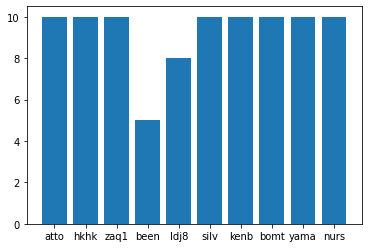

In [ ]:
import matplotlib.pyplot as plt

plt.bar(x, y)
plt.show()

해결문제) 파이썬 re모듈을 활용해 올바른 이메일 주소인지를 확인하는 문제를 만들어보자.

문제 : 이메일 주소 유효성 검사

문제 설명:

입력받은 이메일 주소가 올바른 형식인지 확인하는 프로그램을 작성하세요. 이메일 주소는 다음 조건을 만족해야 합니다:

    1.이메일은 알파벳(대소문자 구분 없음), 숫자, 점(.), 밑줄(_), 하이픈(-) 등의 문자를 사용할 수 있습니다.
    2. 이메일은 @ 문자로 구분되어야 하며, @ 뒤에는 도메인이 오고, 도메인 이름 뒤에는 .com, .org, .net, .edu 등의 확장자가 와야 합니다.
    3. @ 앞부분과 도메인 이름은 최소 1글자 이상이어야 하며, 도메인 부분은 알파벳으로만 구성됩니다.



예시:
"test@example.com" → 유효 / "user_123@domain.net" → 유효
"invalid@domain" → 유효하지 않음 / "@missingusername.com" → 유효하지 않음
"test@com" → 유효하지 않음 / "user@sub.domain.com" → 유효
